In [1]:
using PyPlot, JLD

using StatsBase
# al parecer aquí esta fit(Histogram, etc) y no en statistics.

In [2]:
arxname="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascs-Trays.jld"
arx=jldopen(arxname)
nomine=names(arx)

5-element Array{String,1}:
 "alpha"
 "beta"
 "gamma"
 "spr"
 "uspr"

In [96]:
cual="uspr"
(pos, neg)=read(arx[cual]);

In [97]:
include("./grafTrayAuxFun.jl")

semueve (generic function with 2 methods)

In [104]:
minlong=8
minmov=3
spos=depuratraysets(pos, x-> eslarga(x, minlong) & semueve(x, minmov))
sneg=depuratraysets(neg, x-> eslarga(x, minlong) & semueve(x, minmov));

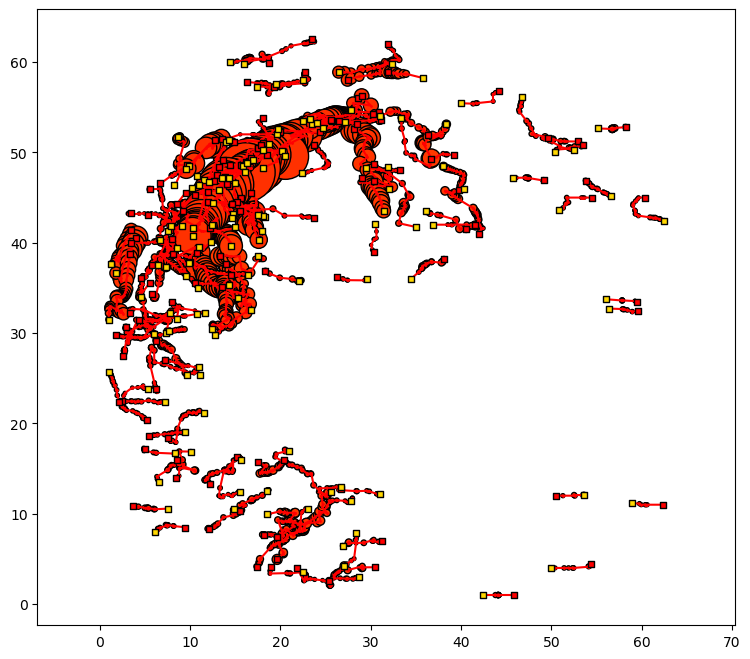

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascs-Trays-uspr.png"

In [105]:
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=1.0
minlong=10
maxlong=20
#colores=Union{}
axis("equal")

for p in spos
    gordura=abs.(p[:,3])
    longus,gordus=size(p)
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
    
        plot(xxpos, yypos, marker="o", markersize=1, color="r", zorder=2)
    
        colores=scatter(xxpos,yypos, s=gordura.*0.25, edgecolors="black", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72, zorder=1 )
    
        principios=scatter(xxpos[1],yypos[1], s=20,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" , zorder=3)
    
    finales=scatter(xxpos[end],yypos[end], s=20, 
        edgecolors="black", 
        color="gold", marker="s", label="Final", zorder=4 )
    
    # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    
end

outgrafname=arxname[1:end-4]*"-"*cual*".png"

#savefig("experimentospr-02.png")
#savefig(outgrafname)

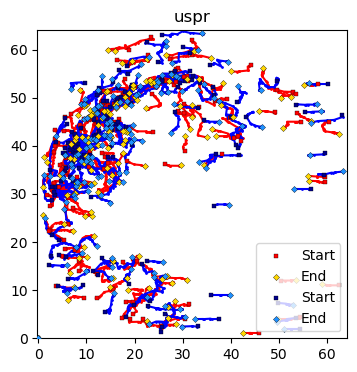

In [106]:
figure(figsize=(4,4))
axis("equal")
xlim(0,64)
ylim(0,64)
bolitasrojas=0
bolitasazules=0

tolerancia=0.0


ms=10 # mareke sizo para los finales y principios
linw=0.25 # linewidth para finlaes y principios

for p in spos
    gordura=abs.(p[:3])
    longus,falsus=size(p)
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r", zorder=2)
        #=
        bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        edgecolors="none", alpha=0.4, c=tiempos, cmap="autumn", 
            vmin=0, vmax=0.72, zorder=1)
        =#
        
        principios=scatter(xxpos[1],yypos[1], s=ms,
        edgecolors="black", lw=linw,
        color="r", marker="s", zorder=3)
    
        finales=scatter(xxpos[end],yypos[end], s=ms, 
        edgecolors="black", lw=linw,
        color="gold", marker="D", zorder=4 )
        
       # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in sneg
    gordura=abs.(p[:3])
    longus,falsus=size(p)
    if mean(gordura)>tolerancia
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b", zorder=2)
        #=
        bolitasazules=scatter(xxpos,yypos, s=gordura,
        edgecolors="none", alpha=0.4, c=tiempos, cmap="winter",
        vmin=0,vmax=0.72, zorder=1)
        =#
        principios=scatter(xxpos[1],yypos[1], s=ms,
        edgecolors="black", lw=linw,
        color="darkblue", marker="s", zorder=3)
    
        finales=scatter(xxpos[end],yypos[end], s=ms, 
        edgecolors="black", lw=linw,
        color="dodgerblue", marker="D", zorder=4 )
        
        
        #annotate(round(tiempos[1]/7022,4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        #annotate(round(tiempos[end]/7022,4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

  principios=scatter(0,0, s=ms,
        edgecolors="black", lw=linw,
        color="r", marker="s", label="Start" , zorder=3)
    
        finales=scatter(0,0, s=ms, 
        edgecolors="black", lw=linw,
        color="gold", marker="D", label="End", zorder=4 )


  principios=scatter(0,0, s=ms,lw=linw,
        edgecolors="black",  label="Start",
        color="darkblue", marker="s", zorder=3)
    
        finales=scatter(0,0, s=ms, lw=linw,
        edgecolors="black", label="End" ,
        color="dodgerblue", marker="D", zorder=4 )
        

legend(loc=4)

title(cual)
#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

outgrafname=arxname[1:end-4]*"-SinksSources-"*cual*".png"

savefig(outgrafname)

In [38]:
outgrafname

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandascs-Traysspr.png"